In [16]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mlt.rc("font", family = "NanumBarunGothic")
%matplotlib inline

In [11]:
class Review():
    def __init__(self, comment, date, star, good, bad):
        self.comment = comment
        self.date = date
        self.star = star
        self.good = good
        self.bad = bad
        
    def show(self):
        print("내용: " + self.comment
             +"\n날짜: " + self.date
             +"\n별점: " + self.star
             +"\n좋아요: " + self.good
             +"\n싫어요: " + self.bad)

def crawl(url):
    soup = BeautifulSoup(urllib.request.urlopen(url).read(), 'html.parser')
    review_list = []
    title = soup.find("h3", class_="h_movie").find("a").text
    div = soup.find("div", class_="score_result")
    data_list = div.select("ul > li")
        
    for review in data_list:
        star = review.find("div", class_="star_score").text.strip()
        reply = review.find("div", class_="score_reple")
        comment = reply.find("p").text
        date = reply.select("dt > em")[1].text.strip()
        button = review.find("div", class_="btn_area")
        sympathy = button.select("strong > span")
        good = sympathy[0].text
        bad = sympathy[1].text
        review_list.append(Review(comment, date, star, good, bad)) 
        
    return title, review_list       

In [12]:
def get_summary(review_list):
    star_list = []
    good_list = []
    bad_list = []
    
    for review in review_list:
        star_list.append(int(review.star))
        good_list.append(int(review.good))
        bad_list.append(int(review.bad))
    
    star_series = pd.Series(star_list)
    good_series = pd.Series(good_list)
    bad_series = pd.Series(bad_list)
    
    summary = pd.DataFrame({"star" : star_series, "good" : good_series, "bad" : bad_series, "score" : good_series / (good_series + bad_series)})
    return summary

In [13]:
movie_code_list = [167613, 136900, 173123, 161967, 101966]

review_lists = []
for i in movie_code_list:
    title, review_list = crawl("https://movie.naver.com/movie/bi/mi/basic.nhn?code=" + str(i) +"#tab")
    summary = get_summary(review_list)
    print("제목: " + title)
    print(summary)
    review_lists.append((title, review_list))

제목: 조커
   star   good   bad     score
0    10  16423   549  0.967653
1    10  10307  1108  0.902935
2    10   8946   516  0.945466
3    10   6780   290  0.958982
4    10   6719   342  0.951565
제목: 어벤져스: 엔드게임
   star   good  bad     score
0    10  22672  638  0.972630
1    10  14937  421  0.972588
2    10  14548  451  0.969931
3    10  12520  519  0.960196
4    10  11298  409  0.965064
제목: 스파이더맨: 파 프롬 홈
   star  good  bad     score
0    10  6396  328  0.951220
1     8  5470  712  0.884827
2     9  4629  166  0.965381
3    10  3951  304  0.928555
4    10  3726  124  0.967792
제목: 기생충
   star   good   bad     score
0    10  23695  1273  0.949015
1    10  15802  1305  0.923715
2    10  14290   913  0.939946
3    10  13870   810  0.944823
4    10  12687   707  0.947215
제목: 토이 스토리 4
   star  good  bad     score
0    10  3961  138  0.966333
1    10  2510  113  0.956920
2    10  2204   39  0.982613
3     7  1912  186  0.911344
4     8  1548   54  0.966292


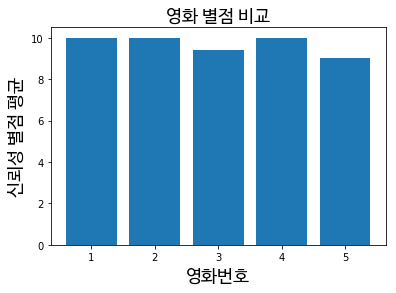

In [22]:
font_path = "C:/Program Files (x86)/Naver/NanumFont/NanumBarunGothic.ttf"
fontprop = fm.FontProperties(fname = font_path, size = 18)
def movie_compare(review_lists):
    X = []
    Y = []
    count = 1
    for movie, review_list in review_lists:
        X.append(count)
        summary = get_summary(review_list)
        summary = summary[summary["score"] > 0.8]
        Y.append(summary["star"].mean())
        count += 1
    plt.bar(X,Y)
    plt.title("영화 별점 비교", fontproperties =fontprop)
    plt.xlabel("영화번호", fontproperties = fontprop)
    plt.ylabel("신뢰성 별점 평균", fontproperties = fontprop)
    plt.show()
    
movie_compare(review_lists)